Dataset Used : https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?select=matches.csv

### **Loading the Data**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### **Data Pre Processing**

In [3]:
for col in data.columns:
    if col not in ["id", "season", "city", "date", "player_of_match", "venue", "result_margin", "target_runs", "target_overs", "umpire1", "umpire2"]:
        print("Unique Values in :",col)
        print(len(data[col].unique()),":" ,data[col].unique())

Unique Values in : match_type
5 : ['League' 'Qualifier 1' 'Qualifier 2' 'Final' 'Eliminator']
Unique Values in : team1
12 : ['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : team2
12 : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : toss_winner
12 : ['Royal Challengers Bengaluru' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : toss_decision
2 : ['field' 'bat']
Unique 

In [4]:
data = data.drop(["id", "date", "player_of_match", "result_margin","target_runs", "target_overs", "method", "result","umpire1", "umpire2"], axis=1)
data.head()

,season,city,match_type,venue,team1,team2,toss_winner,toss_decision,winner,super_over
0,2007/08,Bangalore,League,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,N
1,2007/08,Chandigarh,League,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N
2,2007/08,Delhi,League,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,N
3,2007/08,Mumbai,League,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,N
4,2007/08,Kolkata,League,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,N


In [5]:
len(data)

1095

In [6]:
import pandas as pd

data = pd.read_csv('dataset.csv')

In [7]:
data.head()

,Unnamed: 0,season,city,match_type,venue,team1,team2,toss_winner,toss_decision,winner,super_over
0,0,2007/08,Bangalore,League,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,N
1,1,2007/08,Chandigarh,League,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N
2,2,2007/08,Delhi,League,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,N
3,3,2007/08,Mumbai,League,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,N
4,4,2007/08,Kolkata,League,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,N


In [8]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
le_city = LabelEncoder()
le_venue = LabelEncoder()
le_match_type = LabelEncoder()

In [9]:
data['toss_decision'] = (data['toss_decision'] == 'field').astype(int)
data['super_over'] = (data['super_over'] == 'Y').astype(int)

In [10]:
all_teams = pd.concat([data['team1'], data['team2'], data['toss_winner'], data['winner']])
le_team.fit(all_teams)

LabelEncoder()

In [11]:
data['team1'] = le_team.transform(data['team1'])
data['team2'] = le_team.transform(data['team2'])
data['toss_winner'] = le_team.transform(data['toss_winner'])
data['winner'] = le_team.transform(data['winner'])

In [12]:
data['city'] = le_city.fit_transform(data['city'])
data['venue'] = le_venue.fit_transform(data['venue'])
data['match_type'] = le_match_type.fit_transform(data['match_type'])

In [13]:
data['toss_winner'] = (data['toss_winner'] == data['team2']).astype(int)
data['winner'] = (data['winner'] == data['team2']).astype(int)

In [14]:
import tensorflow as tf


X = data[['team1', 'team2', 'city', 'venue', 'match_type']]
y_tw = tf.keras.utils.to_categorical(data['toss_winner'])
y_td = data['toss_decision'].values.reshape(-1, 1)
y_w = tf.keras.utils.to_categorical(data['winner'])
y_so = data['super_over'].values.reshape(-1, 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tw_train, y_tw_test, y_td_train, y_td_test, y_w_train, y_w_test, y_so_train, y_so_test = train_test_split(
    X, y_tw, y_td, y_w, y_so,
    test_size=0.1,
    shuffle=False
)

### **ANN Model**

In [26]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization

# Input layer
inputs = Input(shape=(5,))

# Hidden layers
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Dense(16, activation='relu')(x)

### **RNN Model**

In [51]:
from keras.models import Model
from keras.layers import Input, SimpleRNN, Dense, Dropout, BatchNormalization

# Input layer (assuming sequence length of 5 and feature size of 1 for RNN input)
inputs = Input(shape=(5, 1))

# LSTM layers
x = SimpleRNN(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = SimpleRNN(64, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = SimpleRNN(32)(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Dense layer before outputs
x = Dense(16, activation='relu')(x)

In [52]:
# Output layers
toss_winner     = Dense(2, activation='softmax', name='toss_winner')(x)
toss_decision   = Dense(1, activation='sigmoid', name='toss_decision')(x)
match_winner    = Dense(2, activation='softmax', name='match_winner')(x)
super_over_prob = Dense(1, activation='sigmoid', name='super_over_prob')(x)

In [53]:
# Create model
model = Model(inputs=inputs, outputs=[toss_winner, toss_decision, match_winner, super_over_prob])

In [54]:
model.compile(
    optimizer='adam',
    loss = {
        'toss_winner': 'categorical_crossentropy',
        'toss_decision': 'binary_crossentropy',
        'match_winner': 'categorical_crossentropy',
        'super_over_prob': 'binary_crossentropy'
    },
    loss_weights={'toss_winner': 0.25, 'toss_decision': 0.25, 'match_winner': 0.35, 'super_over_prob': 0.15},
    metrics={
        'toss_winner': 'accuracy',
        'toss_decision': ['accuracy', tf.keras.metrics.AUC()],
        'match_winner': 'accuracy',
        'super_over_prob': ['accuracy', tf.keras.metrics.AUC()]
    }
)

In [55]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_4        │ (None, 5, 128)    │     16,640 │ input_layer_3[0]… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 5, 128)    │          0 │ simple_rnn_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 128)    │        512 │ dropout_7[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_5        │ (None, 5, 64)     │     12,352 │ batch_normalizat… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 5, 64)     │          0 │ simple_rnn_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 64)     │        256 │ dropout_8[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_6        │ (None, 32)        │      3,104 │ batch_normalizat… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ simple_rnn_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_9[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ toss_winner (Dense) │ (None, 2)         │         34 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ toss_decision       │ (None, 1)         │         17 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ match_winner        │ (None, 2)         │         34 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ super_over_prob     │ (None, 1)         │         17 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 33,622 (131.34 KB)

 Trainable params: 33,174 (129.59 KB)

 Non-trainable params: 448 (1.75 KB)

In [56]:
from keras.utils import plot_model


plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [58]:
history = model.fit(
    X_train, 
    [y_tw_train, y_td_train, y_w_train, y_so_train],
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


19/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7500 - match_winner_accuracy: 0.5205 - match_winner_loss: 0.2219 - super_over_prob_accuracy: 0.2665 - super_over_prob_auc_7: 0.3051 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.5448 - toss_decision_auc_6: 0.5391 - toss_decision_loss: 0.1123 - toss_winner_accuracy: 0.6219 - toss_winner_loss: 0.4159

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7468 - match_winner_accuracy: 0.5138 - match_winner_loss: 0.2212 - super_over_prob_accuracy: 0.2789 - super_over_prob_auc_7: 0.3419 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.5505 - toss_decision_auc_6: 0.5407 - toss_decision_loss: 0.1113 - toss_winner_accuracy: 0.6086 - toss_winner_loss: 0.4143 - val_loss: 0.4705 - val_match_winner_accuracy: 0.4747 - val_match_winner_loss: 0.1710 - val_super_over_prob_accuracy: 0.5657 - val_super_over_prob_auc_7: 0.0000e+00 - val_super_over_prob_loss: 0.0000e+00 - val_toss_decision_accuracy: 0.6162 - val_toss_decision_auc_6: 0.5359 - val_toss_decision_loss: 0.1008 - val_toss_winner_accuracy: 0.8081 - val_toss_winner_loss: 0.1995
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6900 - match_winner_accuracy: 0.4858 - match_winner_loss: 0.2133 - super_over_prob_accuracy: 0.4881 - super_over_prob_auc_7: 0.4532 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.47

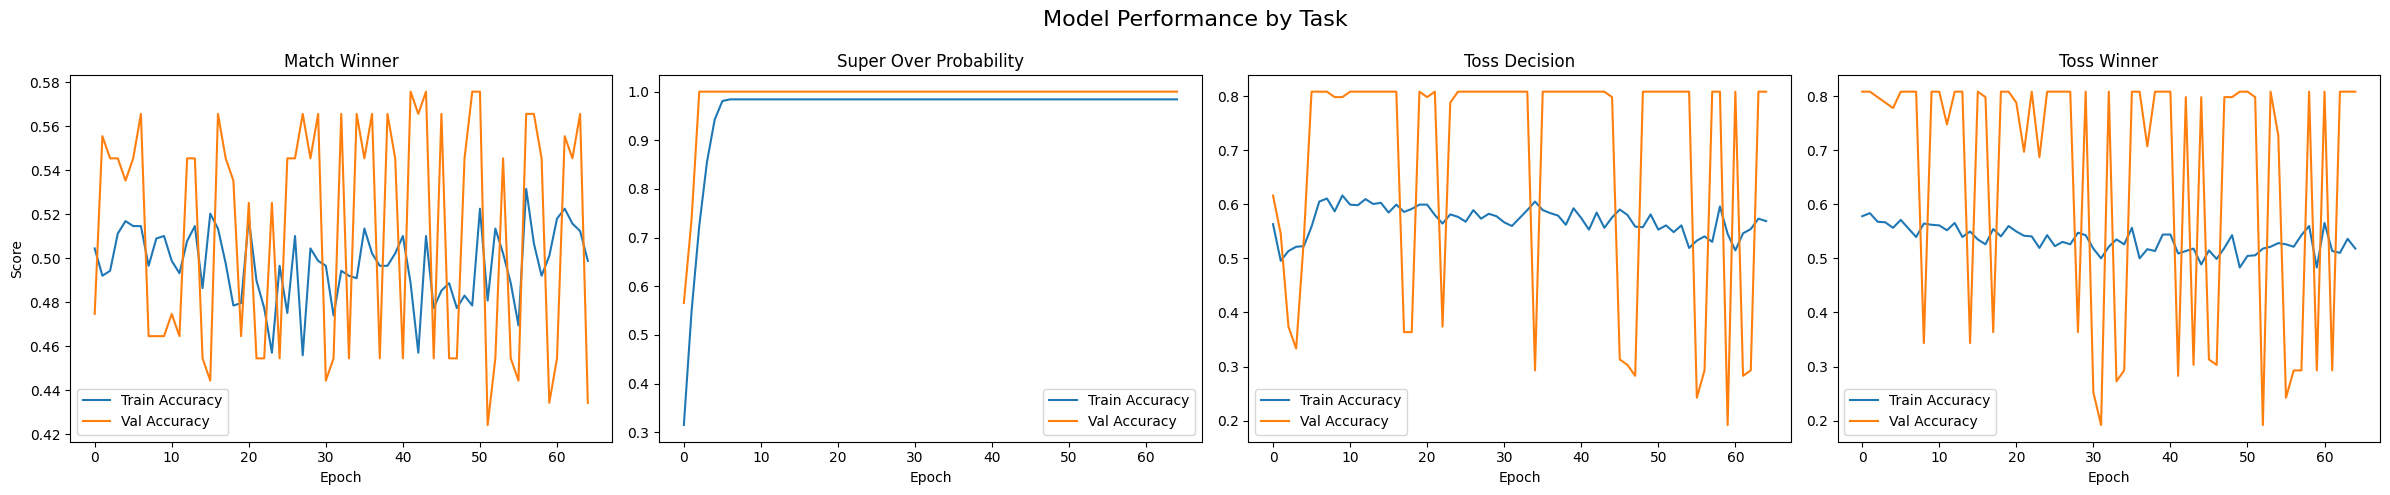

In [59]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Model Performance by Task', fontsize=16)

# 1. Match Winner
axs[0].plot(history.history['match_winner_accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_match_winner_accuracy'], label='Val Accuracy')
axs[0].set_title('Match Winner')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Score')
axs[0].legend()

# 2. Super Over Probability
axs[1].plot(history.history['super_over_prob_accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_super_over_prob_accuracy'], label='Val Accuracy')
axs[1].set_title('Super Over Probability')
axs[1].set_xlabel('Epoch')
axs[1].legend()

# 3. Toss Decision
axs[2].plot(history.history['toss_decision_accuracy'], label='Train Accuracy')
axs[2].plot(history.history['val_toss_decision_accuracy'], label='Val Accuracy')
axs[2].set_title('Toss Decision')
axs[2].set_xlabel('Epoch')
axs[2].legend()

# 4. Toss Winner
axs[3].plot(history.history['toss_winner_accuracy'], label='Train Accuracy')
axs[3].plot(history.history['val_toss_winner_accuracy'], label='Val Accuracy')
axs[3].set_title('Toss Winner')
axs[3].set_xlabel('Epoch')
axs[3].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


### **Saving the Model**

In [34]:
import pickle
from joblib import dump

# Save the trained model
model.save('cricket_model.keras')

# Save the LabelEncoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump({
        'team': le_team,
        'city': le_city,
        'venue': le_venue,
        'match_type': le_match_type
    }, f)


### **Loading the Model**

In [1]:
from tensorflow.keras.models import load_model
import pickle

# Load model
model = load_model('cricket_model.keras')

# Load encoders
with open('label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

le_team = encoders['team']
le_city = encoders['city']
le_venue = encoders['venue']
le_match_type = encoders['match_type']


### **Making sample prediction**

In [29]:
import numpy as np

sample_data = {
    'team1': 'Punjab Kings',
    'team2': 'Royal Challengers Bengaluru',
    'city': 'Chandigarh',
    'venue': 'Punjab Cricket Association Stadium, Mohali',
    'match_type': 'League'
}

sample_input = np.array([[
    le_team.transform([sample_data['team1']])[0],
    le_team.transform([sample_data['team2']])[0],
    le_city.transform([sample_data['city']])[0],
    le_venue.transform([sample_data['venue']])[0],
    le_match_type.transform([sample_data['match_type']])[0],
]])

predictions = model.predict(sample_input)

toss_winner = 'team2' if np.argmax(predictions[0]) == 1 else 'team1'
toss_decision = 'field' if predictions[1][0][0] > 0.5 else 'bat'
match_winner = 'team2' if np.argmax(predictions[2]) == 1 else 'team1'
super_over = 'Yes' if predictions[3][0][0] > 0.5 else 'No'

print("Predicted Toss Winner:", sample_data[toss_winner])
print("Toss Decision:", toss_decision)
print("Predicted Match Winner:", sample_data[match_winner])
print("Possible Super Over?", super_over)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Toss Winner: Punjab Kings
Toss Decision: field
Predicted Match Winner: Punjab Kings
Possible Super Over? No


In [27]:
data['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [26]:
data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [25]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh